<a href="https://colab.research.google.com/github/GODxFATHER/Airbnb-Bookings-Analysis-/blob/main/Individual_Notebook_Airbnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction** 

### <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

### <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

### <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Installing Dependencies**

In [ ]:
!pip install matplotlib --upgrade     # updating matplotlib as we are using bar_label function which is introduced in recent versions(matplotlib >= 3.4.2) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Note - After installing the dependencies, we will have to restart the runtime.**

# **Data Preparation and Cleaning** 

In [ ]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
import folium
from folium import plugins

%matplotlib inline

In [ ]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (13, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [ ]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the dataset

path = '/content/drive/MyDrive/DATA_FILES/Airbnb_NYC_2019.csv'

airbnb_df = pd.read_csv(path)

In [ ]:
# Displaying the dataframe

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Checking the size of dataset

airbnb_df.shape

(48895, 16)

**The dataset contains 48895 observations and 16 features.**

In [ ]:
# Checking for duplicate rows in the dataset

airbnb_df.duplicated().sum()

0

In [ ]:
# Checking the basic information of the dataset

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**The dataset contains a mix of numerical and categorical features.**

**The dataset contain NULL values in "id","name","last_review" and "reviews_per_month" columns.**

In [ ]:
# Counting the number of null values in "name", "host_name", "number_of_reviews" and "last_review" columns

nan_values_cols = ["name", "host_name", "reviews_per_month", "last_review"]
airbnb_df[nan_values_cols].isna().sum()

name                    16
host_name               21
reviews_per_month    10052
last_review          10052
dtype: int64

In [ ]:
# Handling the NULL values in "name", "host_name" and "reviews_per_month" columns

airbnb_df.dropna(subset = ["name", "host_name"], inplace = True)        # Dropping the rows having NULL values in "name", "host_name" column

airbnb_df["reviews_per_month"].fillna(0.0, inplace = True)              # Filling NULL values of "reviews_per_month" with 0.0

In [ ]:
# Converting the data type of "last_review" column to datetime object

airbnb_df["last_review"] = airbnb_df["last_review"].astype("datetime64")

In [ ]:
# Extracting year and month from the "last_review" column

airbnb_df["last_review_month"] = airbnb_df["last_review"].apply(lambda row: row.month)
airbnb_df["last_review_year"] = airbnb_df["last_review"].apply(lambda row: row.year)

In [ ]:
# Dropping "last_review", "reviews_per_month" column

airbnb_df.drop(labels = ["last_review", "reviews_per_month"], axis = 1, inplace = True)        

In [ ]:
# Descriptive summary

col_to_check = ['price',	'minimum_nights','number_of_reviews', 'calculated_host_listings_count','availability_365', 'last_review_month',	'last_review_year']
airbnb_df[col_to_check].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,last_review_month,last_review_year
count,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,38821.000000,38821.000000
mean,152.740309,7.012444,23.273098,7.148369,112.801425,6.173901,2018.288323
std,240.232386,20.019757,44.549898,32.964600,131.610962,2.531374,1.180598
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2011.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000,5.000000,2018.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000,6.000000,2019.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000,7.000000,2019.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000,12.000000,2019.000000


**The minimum price of a listing is mentioned 0 here but Airbnb starts the listing price with a minimum of $10.**

**Minimum availability of a listing is 0 it may be due to following possibilities:**

> **1. May be the listing is booked for a year by the guest.**

> **2. There might be a chance of bad entry.**

**Although Airbnb was founded in 2008 but our dataset contains data from 2011 to 2019.**

**The descriptive summary also tells us outliers are present in many columns of the data.**

In [ ]:
# Changing the minimum price to $10

airbnb_df["price"] = np.where(airbnb_df["price"] < 10, 10, airbnb_df["price"])

In [ ]:
# Creating a new column "price_category"

airbnb_df["price_category"] = pd.cut(airbnb_df["price"], bins = [10, 100, 200, 10000], include_lowest = True, labels = ["low", "mid", "high"])

In [ ]:
# Displaying the final dataframe after data preparation

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,last_review_month,last_review_year,price_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,10.0,2018.0,mid
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,5.0,2019.0,high
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,NaN,NaN,mid
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,7.0,2019.0,low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,11.0,2018.0,low


# <b>Data Exploration and Visualization</b>

**Let's start our data exploration journey by counting the number of listings present in our dataset.**

In [ ]:
# Number of listings present in the dataset

num_listings = airbnb_df["id"].count()
num_listings

48858

> **There are 48,858 listings present in the dataset.**



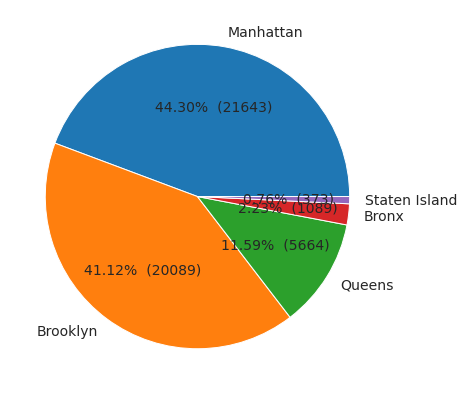

In [ ]:
# Number of listings present in each borough

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

 
data = airbnb_df["neighbourhood_group"].value_counts()
labels = airbnb_df["neighbourhood_group"].value_counts().index

#create pie chart
plt.pie(data, labels = labels ,autopct=make_autopct(data)) # autopct='%.0f%%' )
plt.show()

**We can see**
  * **Manhattan have highest listings and staten island have lowest.**
  * **Manattan and Brooklyn listings constitute 85% of total listings.**



<AxesSubplot:xlabel='longitude', ylabel='latitude'>

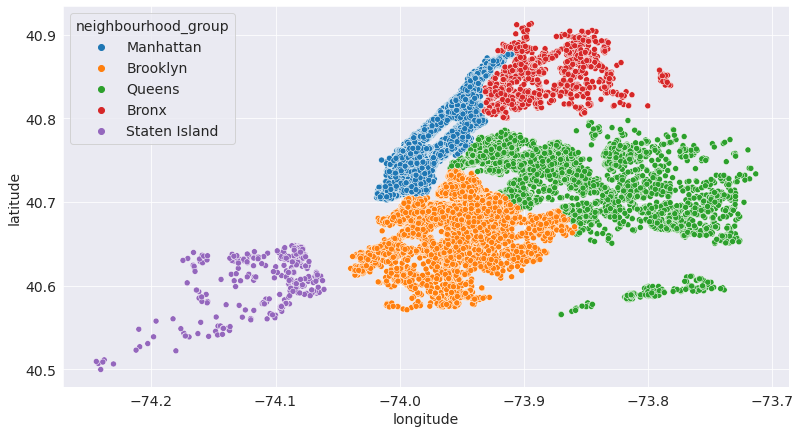

In [ ]:
#visulaization of ncy neighbourhood_group

hue_order = [ 'Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
sns.scatterplot(x = "longitude",y = "latitude", hue = 'neighbourhood_group', hue_order = hue_order, data = airbnb_df)

In [ ]:
# Median price of listings in each neighbourhood_group

airbnb_df.groupby("neighbourhood_group")["price"].median().to_frame()

,price
neighbourhood_group,
Bronx,65.0
Brooklyn,90.0
Manhattan,150.0
Queens,75.0
Staten Island,75.0




> **The median price of a listing in Manhattan is $150 and there is a huge gap in the median price of Manhattan as compared to other neighbourhood groups.**



**Next question we can ask from the data is what is the minimum night stay for a guest for each room type. Let's try to get an answer.**

In [ ]:
# Minimum night stay for each room type

airbnb_df.groupby('room_type')['minimum_nights'].median().reset_index()

,room_type,minimum_nights
0,Entire home/apt,3.0
1,Private room,2.0
2,Shared room,1.0




> **Minimum three nights of stay is required for Entire house, two nights of stay for Private rooms and one night of stay for Shared room.**



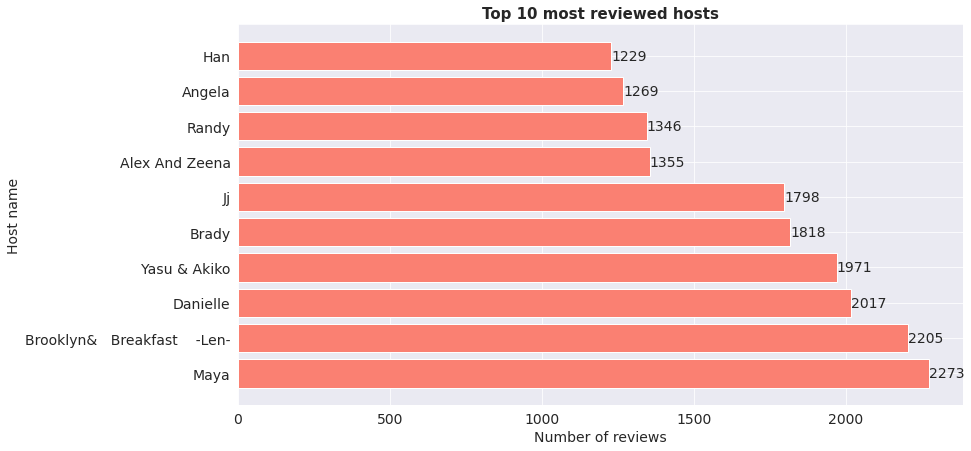

In [33]:
# Top 10 most reviewed host

reviewed_host = airbnb_df.groupby(['host_id', "host_name", "neighbourhood"])['number_of_reviews'].sum().sort_values(ascending=False).reset_index().head(10)
reviewed_host_plot = plt.barh(width = "number_of_reviews", y = "host_name", data = reviewed_host, color = "salmon")
plt.bar_label(reviewed_host_plot)

plt.xlabel("Number of reviews")
plt.ylabel("Host name")
plt.title("Top 10 most reviewed hosts", fontsize = 15, fontweight = "bold")

plt.show()



> **Maya is the most reviewed host with 2273 reviews.**



**Now we will calculate the median price at which these popular host rent their properties to their guests.**

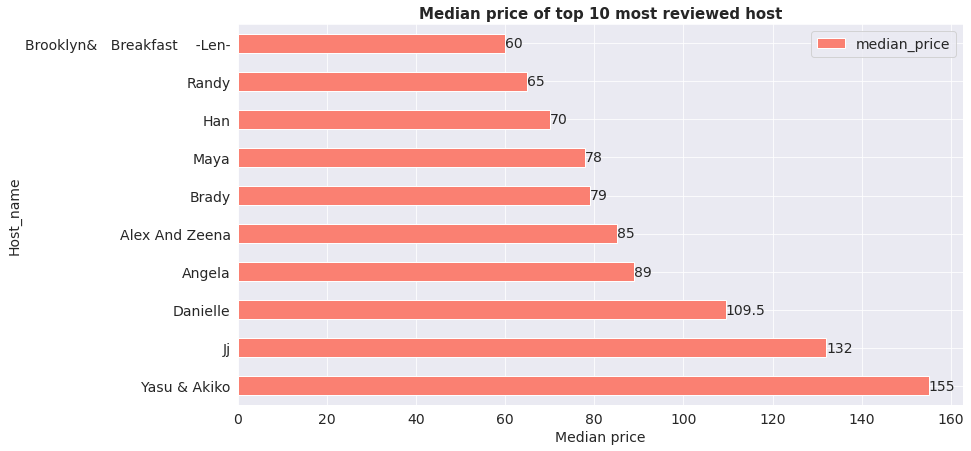

In [ ]:
# Average price of listings of most popular host

reviewed_host_list = reviewed_host["host_name"].to_list() 
top_host_dict = {}
for elem in  reviewed_host_list:
  avg_price = airbnb_df[airbnb_df['host_name'] == elem]["price"].median()
  top_host_dict[elem] = avg_price

avg_price_df = pd.DataFrame(top_host_dict.items(), columns=['Host_name', 'median_price'])
avg_price_df.set_index('Host_name', inplace=True)
avg_price_plot = avg_price_df.sort_values(by = "median_price",ascending=False).reset_index().plot(x = "Host_name",y = "median_price",kind = "barh", color = "salmon")

for container in avg_price_plot.containers:
  avg_price_plot.bar_label(container)

plt.xlabel("Median price")
plt.ylabel("Host_name")
plt.title("Median price of top 10 most reviewed host", fontsize = 15, fontweight = "bold")

plt.show()

> **Among the most reviewed host, Yasu & Akiko has the most expensive listings.**



**We can also calculate the most reviewed neighbourhood of New York City.**



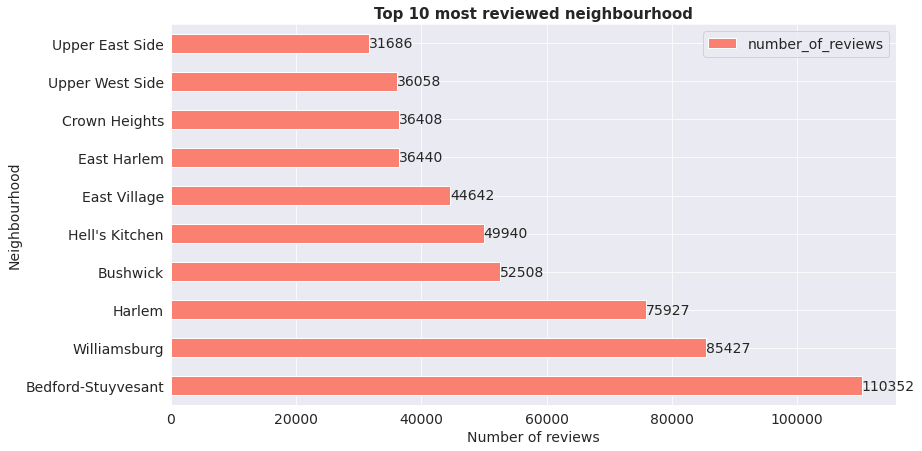

In [ ]:
# Most reviewed neighbourhood

reviewed_nbhd = airbnb_df.groupby(["neighbourhood"])['number_of_reviews'].sum().sort_values(ascending = False).reset_index().head(10)
reviewed_nbhd_plot = reviewed_nbhd.plot(x = "neighbourhood",y = "number_of_reviews",kind = "barh", color = "salmon")

for container in reviewed_nbhd_plot.containers:
  reviewed_nbhd_plot.bar_label(container)

plt.xlabel("Number of reviews")
plt.ylabel("Neighbourhood")
plt.title("Top 10 most reviewed neighbourhood", fontsize = 15, fontweight = "bold")

plt.show()



> **Bedford-Stuyvesant is the most popular neighbouhood. It is due to the fact that Bedford–Stuyvesant has the largest collection of intact and largely untouched Victorian architecture in the United States, with roughly 8,800 buildings built before 1900. I has been a major cultural center for Brooklyn's African American population.**



**We will also calculate the most expensive neighbourhood of New York City.**

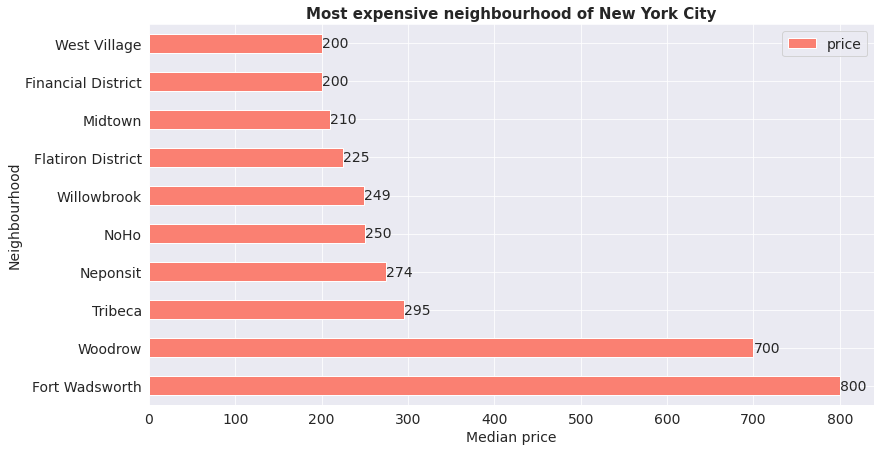

In [ ]:
# Most expensive neighbourhood

costly_nbhd = airbnb_df.groupby(["neighbourhood"])['price'].median().sort_values(ascending = False).reset_index().head(10)
costly_nbhd_plot = costly_nbhd.plot(x = "neighbourhood",y = "price",kind = "barh", color = "salmon")

for container in costly_nbhd_plot.containers:
  costly_nbhd_plot.bar_label(container)

plt.xlabel("Median price")
plt.ylabel("Neighbourhood")
plt.title("Most expensive neighbourhood of New York City", fontsize = 15, fontweight = "bold")

plt.show()



> **Fort Wadsworth is most expensive neighbourhood in the New York City.**



**Now we will be moving to the availability of the listings. We will now visualize the availability of listings in different neighbourhood groups.**

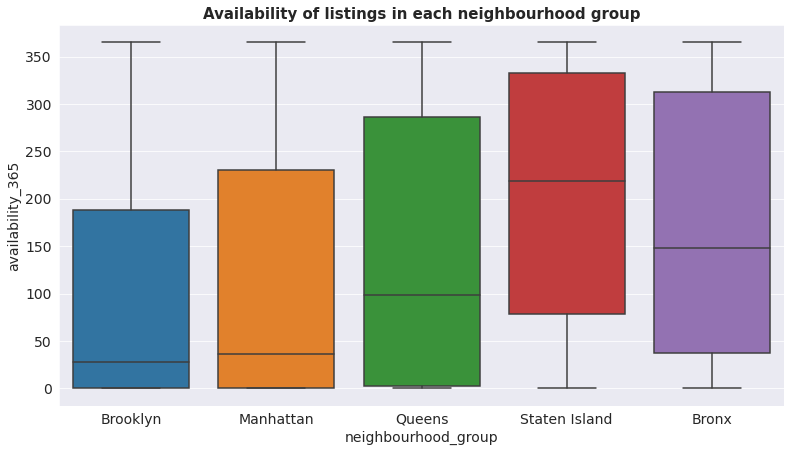

In [ ]:
# Availability of listings in different neighbourhood groups

sns.boxplot(x = "neighbourhood_group", y = "availability_365", data = airbnb_df)
plt.title("Availability of listings in each neighbourhood group", fontsize = 15, fontweight = "bold")

plt.show()



> **Most bookings are opened in Staten Island followed by the Bronx.**


> **Only a few bookings are opened in Brooklyn and Manhattan.**





**Let's dive deeper and look for availability of listings for each room type in every neighbourhood group.**

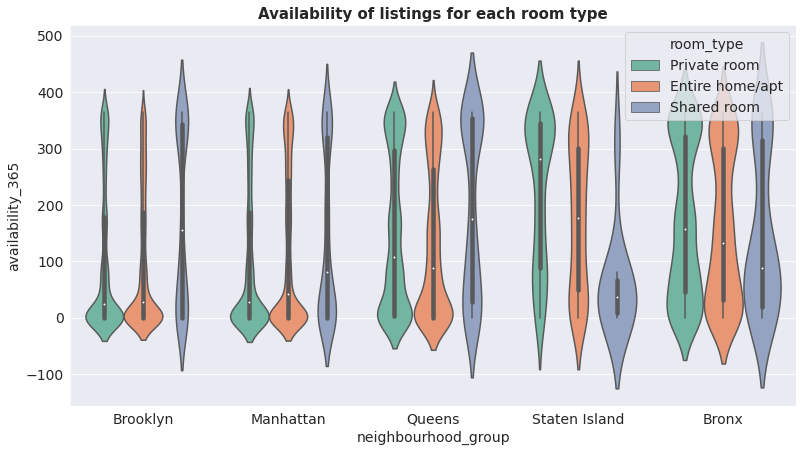

In [ ]:
# Availability of listings for each room type in every neighbourhood group

sns.violinplot(x = "neighbourhood_group", y = "availability_365", data = airbnb_df, hue = "room_type", palette="Set2")
plt.title("Availability of listings for each room type", fontsize = 15, fontweight = "bold")

plt.show()



> **Except Staten Island and Bronx, in all other neighbourhood group mostly shared rooms are available.**


> **In Staten Island and Bronx mostly entire house and private rooms are available.**

**Let's create a correlation matrix to check whether there is any correlation between variables**

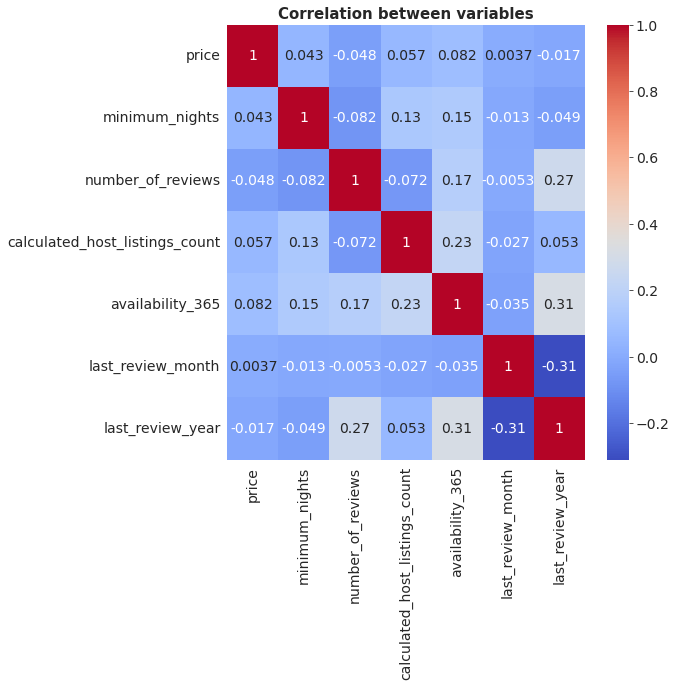

In [ ]:
# Correlation matrix

corr = airbnb_df[col_to_check].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between variables",  fontsize = 15, fontweight = "bold")

plt.show()

> **No columns are highly correlated.**



# **Inferences and Conclusions**

**We have drawn many interesting inferences from the dataset, here's a summary 
of few of them:**


* **Manhattan and Brooklyn are the most crowded boroughs of New York City as compared to Staten Island, Queens and Bronx so increasing the number of hosts  in Manhattan and Brooklyn will help in generating more revenue.**

* **Minimum stay for Airbnb customers in New York city is 2 to 3 days, trying experimenting on reducing it to 1 day might help .**

* **By pushing the popular (most reviewed) hosts listings forward Airbnb can increase its user’s experience.**

* **Ask for suggestions from most reviewed hosts and as well as from customers to enhance their experience.**

* **Advertising more about the famous sites in Queens, Bronx and Staten Island to tourists can boost revenue in these regions as well.**


